# **Sentiment Analysis In Python**

In this notebook we will be doing sentiment analysis using two different techniques:

1. VADER(Valence Aware Dictionary and Sentiment Reasoner(Bag of words approach)

2. Roberta Pretrained Model

In [1]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [3]:
#Reading the Data
df = pd.read_csv('/content/Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
#taking only 5000 records considering local machine capacity
df = df.head(5000)

In [6]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [7]:
df.shape

(5000, 10)

## Quick EDA

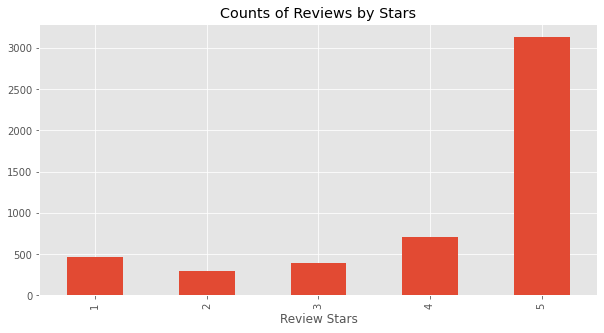

In [8]:
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar',
                                             title = 'Counts of Reviews by Stars',
                                             figsize = (10,5))
ax.set_xlabel('Review Stars')
plt.show()

Lot of reviews belong to 5 star rating.

## Basic NLTK

In [9]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [10]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [13]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# Step 1 : Vader Sentiment Scoring

We will use NLTK's SentimentIntensityAnalyzer to get the negative/neutral/positive scores of the text.

- this uses bag of words approach:
1. stop words are removed(like and, the etc)
2. each word is scored and combines to a total score.

Please note this approach doesn't account for the relationship between words.

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [16]:
sia

In [17]:
sia.polarity_scores('I am so nervous')

{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.3384}

In [18]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [19]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [20]:
#run the polarity score on whole dataset
results = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row['Text']
  myid = row['Id']
  results[myid] = sia.polarity_scores(text)


  0%|          | 0/5000 [00:00<?, ?it/s]

In [21]:
pd.DataFrame(results)

,1,2,3,4,5,6,7,8,9,10,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.1150,0.0000,0.080,0.0250,0.0260,0.0970,0.1540,0.0000
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.5650,0.8180,0.8480,0.6790,0.692,0.8830,0.7640,0.8270,0.6370,0.7170
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.4350,0.1820,0.0370,0.3210,0.228,0.0920,0.2100,0.0760,0.2090,0.2830
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.9531,0.7177,-0.8264,0.9693,0.792,0.7193,0.9846,-0.0554,0.9078,0.9923


In [22]:
vaders = pd.DataFrame(results).T

In [23]:
vaders.head()

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [24]:
vaders = vaders.reset_index().rename(columns = {'index':'Id'})
vaders = vaders.merge(df,how = 'left')

#now we will have sentiment score merged with main dataset

In [25]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


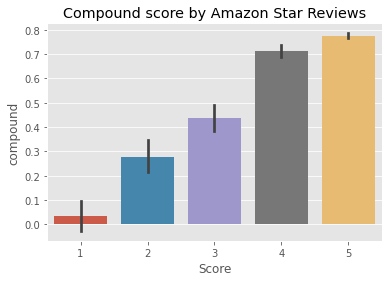

In [26]:
ax = sns.barplot(data = vaders, x = 'Score', y = 'compound')

ax.set_title('Compound score by Amazon Star Reviews')
plt.show()

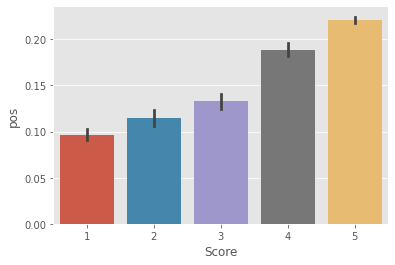

In [27]:
sns.barplot(data=vaders, x = 'Score', y = 'pos')

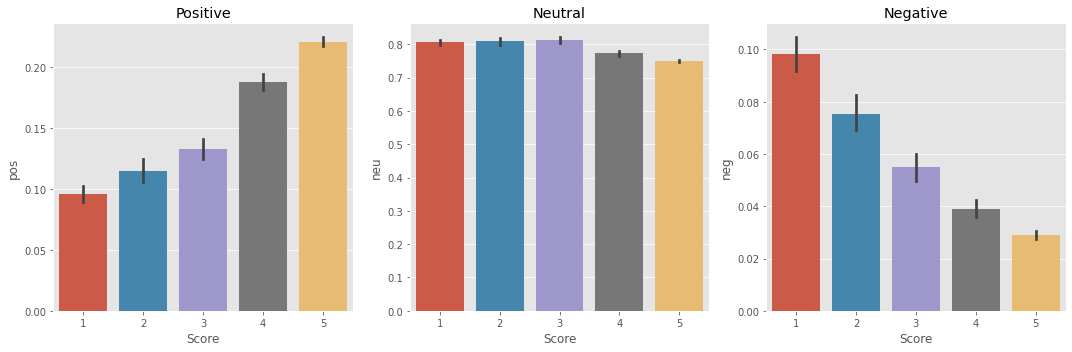

In [28]:
fig , axs = plt.subplots(1,3,figsize = (15,5))
sns.barplot(data = vaders, x='Score', y= 'pos', ax=axs[0])
sns.barplot(data = vaders, x='Score', y= 'neu', ax=axs[1])
sns.barplot(data = vaders, x='Score', y= 'neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Above chart shows there is lesser positive reviews with 1 star and lesser negative reviews with 5 stars.
Neutral reviews have almost similar star ratings.
So we can say vader is doing pretty good job here.

# Step 3: Roberta Pretrained Model

- use a model trained on large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [29]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [31]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer  = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [32]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [33]:
#Run Roberta Model

encoded_text = tokenizer(example,return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

scores_dict = {
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9763551, 'roberta_neu': 0.020687476, 'roberta_pos': 0.0029573715}


In [34]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example,return_tensors = 'pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)

  scores_dict = {
      'roberta_neg':scores[0],
      'roberta_neu':scores[1],
      'roberta_pos':scores[2]
  }
  return(scores_dict)


In [35]:
results = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"] = value

    roberta_results = polarity_scores_roberta(text)
    both = {**vader_result_rename,**roberta_results}
    results[myid] = both
  except RuntimeError:
    print(f"Broke for id {myid}")


  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863
Broke for id 1053
Broke for id 1070
Broke for id 1156
Broke for id 1321
Broke for id 1375
Broke for id 1498
Broke for id 1575
Broke for id 1796
Broke for id 1826
Broke for id 2169
Broke for id 2248
Broke for id 2476
Broke for id 2492
Broke for id 2584
Broke for id 2610
Broke for id 2897
Broke for id 2898
Broke for id 2902
Broke for id 2928
Broke for id 2942
Broke for id 2944
Broke for id 2947
Broke for id 2948
Broke for id 3022
Broke for id 3023
Broke for id 3025
Broke for id 3306
Broke for id 3788
Broke for id 3969
Broke for id 4107
Broke for id 4110
Broke for id 4307
Broke for id 4316
Broke for id 4408
Broke for id 4483
Broke for id 4512
Broke for id 4553
Broke for id 4583


In [36]:
results_df = pd.DataFrame(results).T
results_df = results_df.reset_index().rename(columns = {'index':'Id'})
results_df = results_df.merge(df, how='left')

In [37]:
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,4996,0.025,0.883,0.092,0.7193,0.100337,0.300059,0.599604,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4952,4997,0.026,0.764,0.210,0.9846,0.019922,0.092043,0.888035,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4953,4998,0.097,0.827,0.076,-0.0554,0.602979,0.333857,0.063164,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4954,4999,0.154,0.637,0.209,0.9078,0.011522,0.044735,0.943743,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


Lets compare scores between models

In [38]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

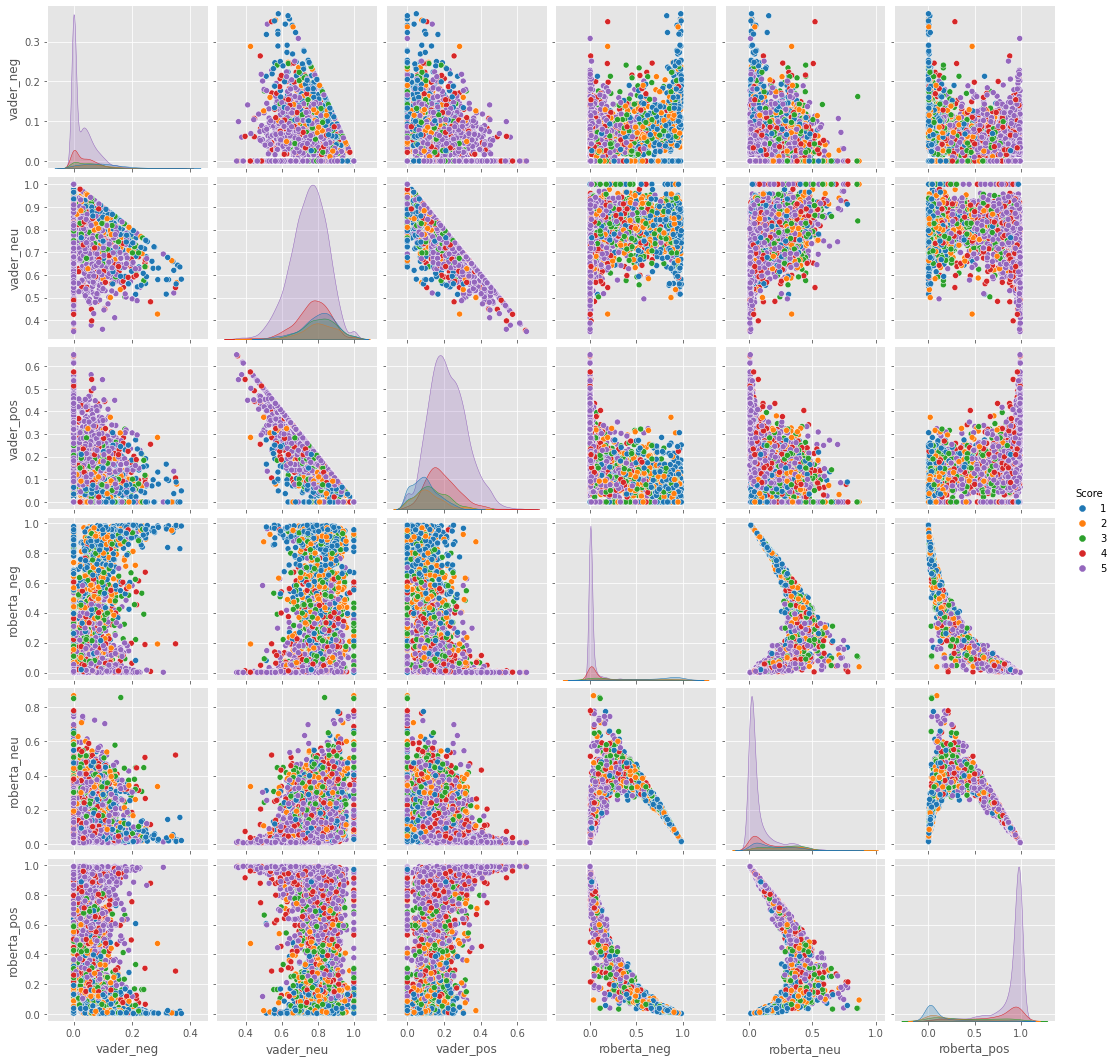

In [39]:
sns.pairplot(data=results_df, 
             vars=['vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette = 'tab10')
plt.show()

From above charts we can say that roberta model is more confident while classifying the reviews.

# Step 4: Review Example

- Positive 1-star and Negative 5-star Reviews

Lets look at some example where the model scoring and review score differ the most.

Positive Sentiment 1-star Review

In [40]:
results_df.query('Score == 1') \
.sort_values('roberta_pos',ascending = False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [41]:
results_df.query('Score == 1') \
.sort_values('vader_pos',ascending = False)['Text'].values[0]

"Second ingredient is SUGAR! Need I say more? Make your own bisquit mix, it's super easy!"

Above review is sarcastic. It sounds like a positive to our model but it is negative in actual world.

Negative Sentiment 5-star review

In [42]:
results_df.query('Score == 5') \
.sort_values('roberta_neg',ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [43]:
results_df.query('Score == 5') \
.sort_values('vader_neg',ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Extra: The Transformer Pipeline
- Quick and easy way to run sentiment predictions

In [44]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [45]:
sent_pipeline('I love pizza')

[{'label': 'POSITIVE', 'score': 0.9997534155845642}]

In [46]:
sent_pipeline('I love bad pizza')

[{'label': 'NEGATIVE', 'score': 0.9954721927642822}]

## I hope you liked the analysis!

# Thanks for your time.